# Finding Pittsburgh's Safest Neighborhood

### Team Name: Canvas Group 11

## Introduction

When looking for Pittsburgh's "Safest" Neighborhood we decided to look at a wide range of different metrics that could be considered part of the "Safety" of a particular neighborhood.

The metrics we decided to use to find the Safest Neighborhood are:

* The Number of Fire Incidents in each Neighborhood
* Food Code Violations
* Amount of Crime

# Number of Fire Incidents - Anthony Chen

In [2]:
#imports

import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

**In order to find the "safest" neighborhood we are looking for the neighborhood that has the least amount of fire incidents.**

**First we find the neigborhood with the lowest number of fire incidents.**

In [3]:
fires = pd.read_csv("FireIncidentsinCityofPittsburgh.csv")
fires

,_id,call_no,incident_type,type_description,address,alarms,alarm_time,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,F160029985,111.0,Building fire,"800 BLOCK CENTER ST, WILKINSBURG PA 15221",1,2016-04-21T05:01:04,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-16,40.441275,-79.882485
1,2,F180022058,111.0,Building fire,"1100 BLOCK JANE ST, WILKINSBURG PA 15221",1,2018-03-13T08:34:43,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-21,40.436342,-79.881003
2,3,F180022102,131.0,Passenger vehicle fire,"SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212",0,2018-03-13T11:54:23,231EN32,2406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1A,NaN,NaN
3,4,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",0,2017-05-31T08:39:47,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
4,5,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",1,2018-03-09T10:26:42,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9562,11090,F230099673,113.0,"Cooking fire, confined to container","1300 BLOCK PAULSON AVE, PITTSBURGH PA",1,2023-11-23T06:06:52,231EN15,1203.0,Lincoln-Lemington-Belmar,9.0,12.0,4.200312e+10,2.0,12.0,5.0,3-15,40.468627,-79.901165
9563,11091,F230099792,113.0,"Cooking fire, confined to container","3400 BLOCK FORBES AVE, PITTSBURGH PA",1,2023-11-23T15:10:53,231EN10,405.0,Central Oakland,3.0,4.0,4.200304e+10,3.0,4.0,4.0,2-14,40.438419,-79.960901
9564,11092,F230099124,112.0,Fires in structure other than in a building,"RAILROAD ST & 30TH ST, PITTSBURGH PA",1,2023-11-21T10:12:00,231EN03,203.0,Strip District,7.0,6.0,4.200302e+10,6.0,6.0,2.0,3-2,40.460192,-79.974403
9565,11093,F230100291,113.0,"Cooking fire, confined to container","100 BLOCK WINSLOW ST, PITTSBURGH PA",1,2023-11-25T14:01:35,231EN08,1204.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3-12,NaN,NaN


**This is the dataset we will be looking at**

Since most of the fire incidents are labeled with the the neighborhood they occured in. We can just count the amount of incidents in each neighborhood and then sort by the least.

In [4]:
#sorted values by neighborhood by # of incidents in decending order

firesN = fires.groupby("neighborhood").count()
lowfiresN = firesN[["_id"]].sort_values(by="_id",ascending=True).iloc[1:]

#print head
lowfiresN_head = lowfiresN.head(10)
lowfiresN

,_id
neighborhood,
Regent Square,9
Mt. Oliver,11
East Carnegie,11
Ridgemont,12
Oakwood,13
...,...
Hazelwood,244
Squirrel Hill South,253
South Side Flats,261


**Here is a bar graph representing the 10 neighborhoods with the lowest fire incidents**

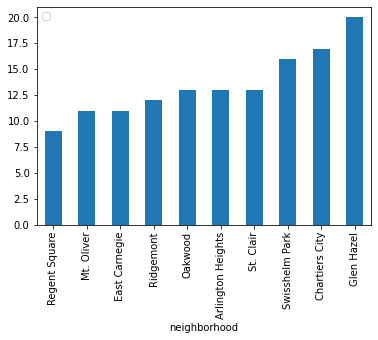

In [8]:
lowfiresN_head.plot(kind = "bar", y = "_id")

With this we have sorted our neighorhoods by the number of incidents that have occured in each neighborhood in decending order. Above is listed the 10 neighborhoods with the least number of fire incidents.

**Now we transform this data into a dataframe that can be merged with a map of the neighborhoods**

In [9]:
#Moves dataframe into dictionary, then to different arrays

lowfiresDict = lowfiresN.to_dict("Split")
neighborhood_list = lowfiresDict["index"]
incidents_list = lowfiresDict["data"]
incidents_listINT = []
for i in incidents_list:
    incidents_listINT.append(i[0])
d = {'hood': neighborhood_list, 'incidents': incidents_listINT}

#Makes more workable dataframe
lowfiresDF = pd.DataFrame(data = d)
lowfiresDF

,hood,incidents
0,Regent Square,9
1,Mt. Oliver,11
2,East Carnegie,11
3,Ridgemont,12
4,Oakwood,13
...,...,...
85,Hazelwood,244
86,Squirrel Hill South,253
87,South Side Flats,261
88,Central Business District,266


**Here is a map that we will use to visually represent all the neighborhoods**

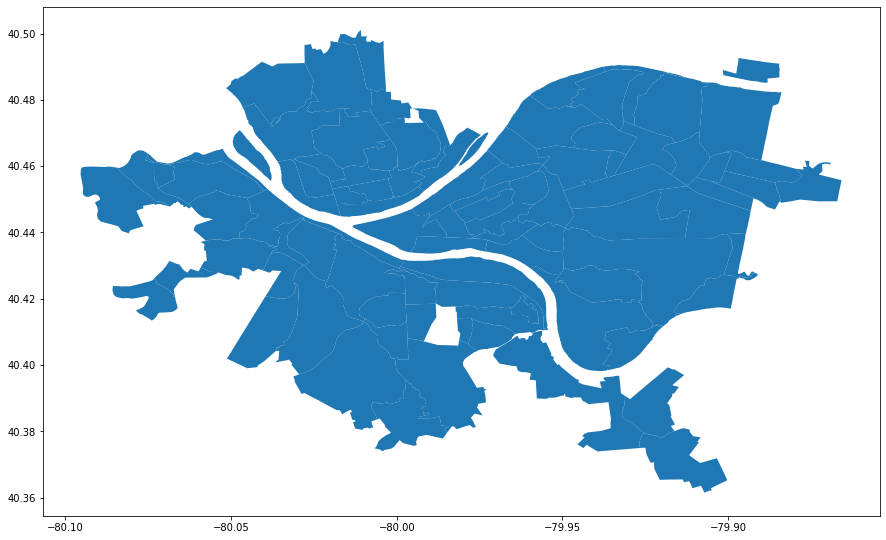

In [10]:
Nmap = gpd.read_file("Neighborhoods_.shp")
Nmap.plot(figsize = (15, 10))

**And here is a plotted map of all fire incidents.**

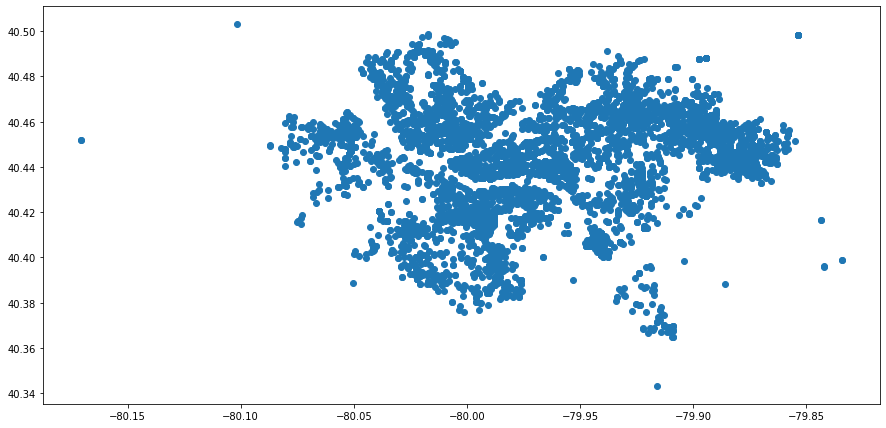

In [11]:
Fmap = gpd.read_file("fireincidents.shp")
Fmap.plot(figsize = (15, 10))

By using the dataframe we made, that correlates the neighborhoods and the number of fire incidents. We can generate a map that shows the percentage of fire incidents in the city, seperated by nighborhood.

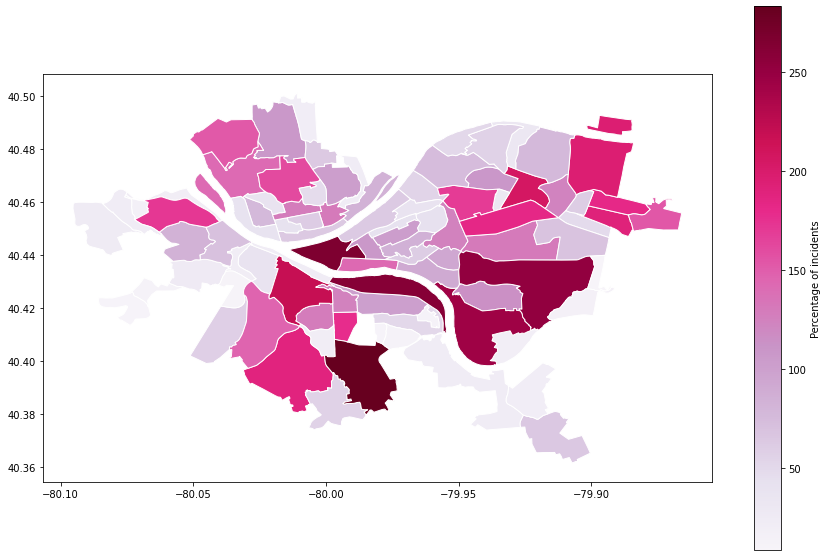

In [12]:
#Merges compatible dataframe with map data, then plots data

firesMap = Nmap.merge(lowfiresDF, how = 'left', left_on = 'hood', right_on = 'hood')
firesMap.plot(column='incidents',
                cmap = 'PuRd',
                  edgecolor = 'white',
                  legend = True,
                  legend_kwds = {'label': 'Percentage of incidents'},
                  figsize = (15, 10),)

Since most, but not all of the fire incidents were marked with a nieghborhood. We can repeat the steps up aboves for reported fire-zone, because all the incidents are marked with the fire-zone which it occured.

In [13]:
#Same data gathering process as before

firesFZ = fires.groupby("fire_zone").count()
lowfiresFZ = firesFZ[["_id"]].sort_values(by="_id",ascending=True).iloc[1:]
lowfiresDictFZ = lowfiresFZ.to_dict("Split")
neighborhood_listFZ = lowfiresDictFZ["index"]
incidents_listFZ = lowfiresDictFZ["data"]
incidents_listINTFZ = []
for i in incidents_listFZ:
    incidents_listINTFZ.append(i[0])
d = {'dist_zone': neighborhood_listFZ, 'incidents': incidents_listINTFZ}
lowfiresDF_FZ = pd.DataFrame(data = d)
lowfiresDF_FZ

,dist_zone,incidents
0,3-26,1
1,3-15B,1
2,3-7B,1
3,F278-001,1
4,2-4B,1
...,...,...
122,4-24,280
123,2-1,297
124,1-14,298
125,1-16,299


**We can compare this map of the fire-zones with the map of the fire incidents seperated by neighborhoods.**

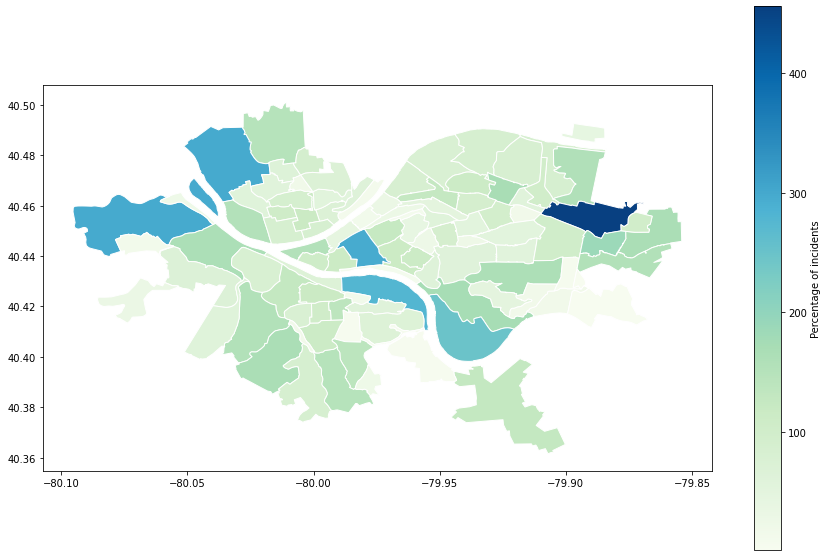

In [14]:
#Reads in fire zone map, and merges with dataframe created above

FZmap = gpd.read_file("pghdb_sde_Fire_Zones.shp")
firesZonesMap = FZmap.merge(lowfiresDF_FZ, how = 'left', left_on = 'dist_zone', right_on = 'dist_zone')
firesZonesMap.plot(column='incidents',
                cmap = 'GnBu',
                  edgecolor = 'white',
                  legend = True,
                  legend_kwds = {'label': 'Percentage of incidents'},
                  figsize = (15, 10),)

### Conclusion - Fire Incidents

So in conlusion, it is safe to assume, after comparing the map of fire incidents by neighborhood with the one with the fire-zones and from the data from the table, that the neigborhood of Regent Square has the least amount of fires (6). That we can say that Regent Square is the best neighborhood in terms of the least amount of fire incidents, followed close behind by Mt. Oliver (11) and East Carnegie (11).

And in terms of the neighborhood with the most number of fire incidents, that would Carrick with a recorded 283 incidents.

As for my personal favorite neighborhood Bloomfield, it ranked pretty low on the list at the 75 most fires. So pretty far from what is considered the safest in terms of fire safety

# Food Code Violations

## By: Nicholas Myers

Food Safety is extraordinarily important when it comes to the overall safety of a neighborhood. It'd be horrible if one were to go out to the local grocery store or restaurant, only for them to have unsafe food preperation/storage conditions. To combat this, I dedicated my ~~life~~ project to determining what neighborhood has the safest restaurants/stores.

In [15]:
# import the important things
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

foodCodeViolations = pd.read_csv("Food-Code-Violations.csv")

#Grab the length so we know what kind of behemoth we're working with:
len(foodCodeViolations)

284744

That's a lot. The csv is 98MB and has data going back to 2014, as well as goes into detail about every establishment in the county. However, since this concerns Pittsburgh neighborhoods, we can weed out the ones from outside of the city.

In [16]:
#makes a subdivision of the original csv, except it only counts the ones in Pittsburgh
#I'm using the 'municipal' tab, since all of the wards in Pittsburgh contain 'Pittsburgh-1'(ward number).
#Ergo, Rather than getting once with the city labeled as Pittsburgh
quearyMask = foodCodeViolations['municipal'].str.contains("Pittsburgh-")
pghFoodCodeViolations = foodCodeViolations[quearyMask]
len(pghFoodCodeViolations)

102827

Much better. From this, we can get a count of how health code violations are distributed by neighborhoods.

In [17]:
#makes a dictonary to count the total amount of violations a neighborhood has
hoodVios = {"Ward":[], "Total Violations":[]}
for i, row in pghFoodCodeViolations.iterrows():
    wardNo = int(row['municipal'][12:])
    if wardNo not in hoodVios["Ward"]:
        hoodVios["Ward"].append(wardNo)
        hoodVios["Total Violations"].append(1)
    else:
        hoodVios["Total Violations"][hoodVios["Ward"].index(wardNo)] += 1
        
#turns the completed dictonary into a pandas series
violationsByHood = pd.DataFrame(hoodVios)
violationsByHood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Ward              32 non-null     int64
 1   Total Violations  32 non-null     int64
dtypes: int64(2)
memory usage: 640.0 bytes


Unfortunately, it seems that the only data avaliable is for the wards, and not the neighborhoods. Fortunately, the 32 wards are just another subdivison of the 90 neighborhoods. If we're lucky, some neighborhoods are their own ward, like Carrick (the best), otherwise, we could get at a cluster of about 2 or three neighborhoods. Either way, we determine what ward/area has the unsafest food facilities.

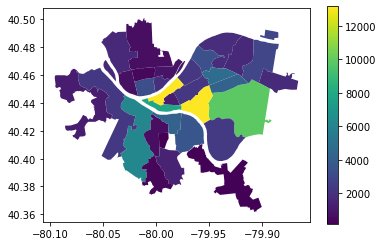

In [18]:
#creates map of wards
wards = geopandas.read_file("Wards.shp")
#merges the data and creates a map
violationsMap = wards.merge(violationsByHood, how="left", left_on="ward", right_on="Ward")
violationsMap.plot(column = 'Total Violations', legend = True)

Nice Job, Carrick

Although not perfect, it most certainly is something. What this map shoes is that a lot of the neighborhoods in the central part of the city are riddled with health code violations, while much of the South Hills and North Shore seem to lack them. Although, we can make a table to view which wards have the most/least amount of violations.

In [19]:
violationsByHood.sort_values("Total Violations", ascending = False).head()

,Ward,Total Violations
13,4,13168
0,2,13151
14,14,9888
4,1,7796
8,19,6175


Now, I can manually determine which neighborhoods are in each ward. I used [this](https://www.arcgis.com/apps/mapviewer/index.html?webmap=2df51c8e9ff8434cbed266238ceaea30) map from the internet.

**Ward 4: Oakland** (includes North Oakland, Central Oakland, West Oakland, and South Oakland)

**Ward 2: Strip District & much of Downtown**

**Ward 14: Squirrel Hill North/South, Point Breeze, Swisshelm Park, and Regent Square**

**Ward 1: Bluff & the rest of Downtown (not covered by Ward 2)**

**Ward 19: Beechview, Mt. Washington, South Shore, Duquesne Heights, andMuch of Brookline**

As for the safest:

In [20]:
violationsByHood.sort_values("Total Violations").head()

,Ward,Total Violations
30,30,187
25,31,250
18,32,439
31,25,490
20,18,644


As for the neighborhoods in these wards:

**Ward 30: Knoxville**

**Ward 31: Hays, New Homestead, Lincoln Place**

**Ward 32: Overbrook and half of Brookline (not included in Ward 19)**

**Ward 25: A Majority of Central North Side**

**Ward 18: Bon Air, Beltzhoover, Allentown**

## Conclusion:

While this experiment is slightly flawed (i.e., there are a higher amound of restaurants in the Strip District compared to Knoxville), but nonethless, it shows a pattern. Considering there are a considerable number of health code violations in Central Pittsburgh is notable. If one were to avoid such areas with high violation rates (16000 violations in 10 years on a few dozen city blocks?), then the food may not be as safe. While I have a bias for Carrick, it wouldn't be a bad neighborhood in this scenario. However, with my personal experiences, a neighborhood like **Brookline** might be optimal, considering Brookline Boulevard and West Liberty both are bustling little communities with numerous restaurants and buisnesses (as well as being in South Brookline; the part covered by Ward 32!). 

Assuming I had all of the time in the world, I would definitly do a violations per restaurant, and perhaps even use the coordinates to determine which neighborhood they're exactly in (since Knoxville winning the least amount of food violations is underwhelming; I can't name a single restaurant in Knoxville!)

# Amount of Crime

## By: Daniel Gornick

When rating the overall safety of a neighborhood, most will tell you that one of (if not) the most important things to consider is the amount of crime that occurs in the area. Following this general consensus, I decided to rank the neighborhoods of Pittsburgh from the least to the highest amount of crime. In order to rank them, I will find the total number of incidents per neighborhood, and divide that by the number of people in that neighborhood. I will then multiply that number by 100, which will give me the total number of incidents per 100 people. To achieve this, I will be using 2 datasets: the Pittsburgh Police Incident Blotter (Archive), and the Total Population of Pittsburgh Neighborhoods.

In [21]:
# Opens the Incident Blottter .csv file
crimeData = pd.read_csv("PoliceIncidentData.csv")

Since I'm looking for the current safest neighborhood, I'm only going to include incidents that occurred during and after the year 2021. Additionally, the incident blotter includes many columns of information, so I will simpifly the data by removing the columns I don't need.

In [22]:
# This query mask gives me only the entries from the dataset that occurred during and after the year 2021. 
# This works because the INCIDENTTIME starts with the year in every entry.
queryMask = (crimeData['INCIDENTTIME'].str.startswith('2021') | crimeData['INCIDENTTIME'].str.startswith('2022') | 
             crimeData['INCIDENTTIME'].str.startswith('2023'))

# Applies the query mask to the dataset
crimeDataRecent = crimeData[queryMask]

# Removes unnecessary columns of information
crimeDataRecent = crimeDataRecent.drop(['_id', 'PK', 'CCR', 'HIERARCHY', 'INCIDENTLOCATION', 'CLEAREDFLAG', 'INCIDENTZONE', 'INCIDENTHIERARCHYDESC',
                                        'OFFENSES', 'INCIDENTTRACT', 'COUNCIL_DISTRICT', 'PUBLIC_WORKS_DIVISION', 'X', 'Y'], axis=1)
# Displays first 3 entries
crimeDataRecent.head(3)

,INCIDENTTIME,INCIDENTNEIGHBORHOOD
34298,2021-01-11T04:54:00,Strip District
34299,2021-01-09T22:29:00,Northview Heights
34346,2021-01-01T00:07:00,Sheraden


In [23]:
# Displays last 3 entries
crimeDataRecent.tail(3)

,INCIDENTTIME,INCIDENTNEIGHBORHOOD
137591,2023-09-19T13:00:00,South Side Flats
137592,2023-09-18T17:40:00,Friendship
137593,2023-08-17T23:59:00,North Shore


Now that I've narrowed down the entries to the years including 2021 to the present, I need to get a count for how many entries there were for each neighborhood. Fortunately, the pandas method value_counts() does exactly that.

In [24]:
# Finds how many entries there were in each neighborhood looking at the column INCIDENTNEIGHBORHOOD
crimeNeighborhoods = crimeDataRecent['INCIDENTNEIGHBORHOOD'].value_counts()

# Since the .value_count() method returns a series, I need to make it a dataframe
crimeNeighborhoods = crimeNeighborhoods.to_frame()

# This renames the count of entries column to Incidents
crimeNeighborhoods = crimeNeighborhoods.rename(columns={'INCIDENTNEIGHBORHOOD': 'Incidents'})

# Displays first 5 entries
crimeNeighborhoods.head(5)

,Incidents
Central Business District,7686
South Side Flats,5020
Carrick,3632
East Liberty,2852
Brookline,2642


Knowing how many incidents have occurred in each neighborhood, I can get to work using the information from the Total Population of Pittsburgh Neighborhoods dataset to find the number of crimes per 100 people for each neighborhood. To prevent the results from being heavily skewed, neighborhoods with a population of less than or equal to 500 are excluded.

In [25]:
# Opens the Total Population csv file
population = pd.read_csv("total-population.csv")

# Creates a dictionary that will be used to store the crimes per 100 people for each neighborhood
crimeP100 = dict()

# For each neighborhood in the crimeNeighborhoods dataframe, this temporarily saves the number of crimes 
# in that neighborhood and the neighborhood name as a variable
for index, row in crimeNeighborhoods.iterrows():
    currNeighborhood = index
    incidents = row['Incidents']
    
    # This finds the same neighborhood name in population, and checks to see if its total population is above 500. 
    # It then adds the neighborhood name as a key to the dictionary along with its crimes per 100 people that is calculated.
    # The process is repeated with the rest of the neighborhoods in crimeNeighborhoods.
    for index, row in population.iterrows():
        if currNeighborhood == row["Neighborhood"] and int(row['Estimate; Total']) > 500:
                crimeP100[currNeighborhood] = (int((incidents / int(row['Estimate; Total']))*100))
                break
                
# This turns the dictionary into a dataframe
crimeP100 = pd.DataFrame.from_dict(crimeP100, orient='index')

# This renames the column of crimes per 100 people 
crimeP100 = crimeP100.rename(columns={0: 'Crimes Per 100 People'})

# Displays first 10 entries
crimeP100.head(5)

,Crimes Per 100 People
Central Business District,189
South Side Flats,79
Carrick,35
East Liberty,51
Brookline,20


Now that I have a dataframe of all the neighborhoods and their crimes per 100 people, I can try to graph them to see which one would be the safest to live in.

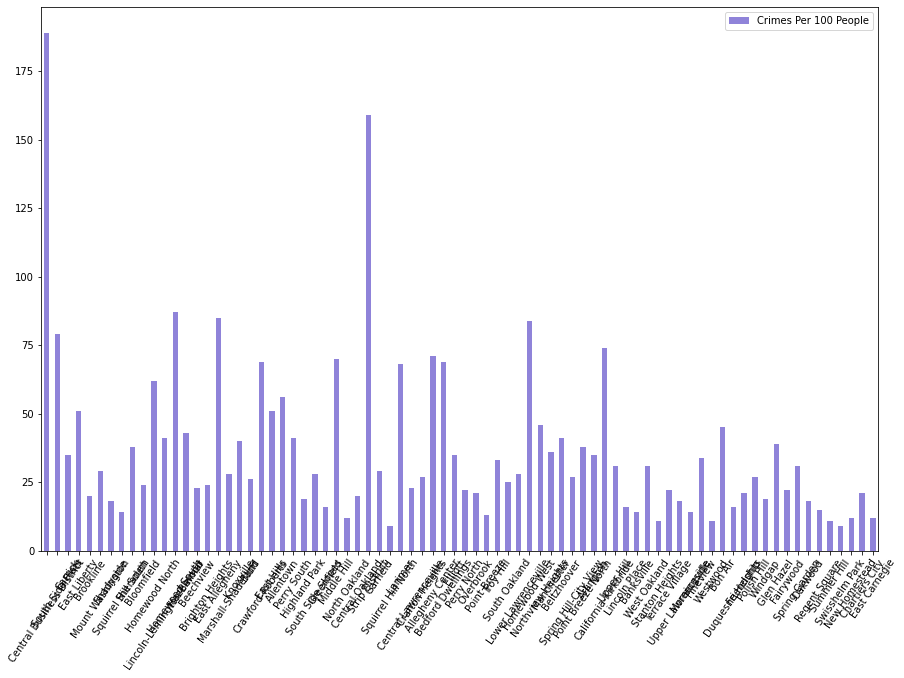

In [26]:
# Creates a bar graph that slightly rotates the x-axis labels, makes it bigger, and changes the color
crimeP100.plot(kind='bar',alpha=0.75, rot=55, figsize = (15, 10), color = 'slateblue')

# Locks the legend to the top right of the graph
plt.legend(bbox_to_anchor=(1,1))

Since it turned out really messy and hard to see which neighborhood is which, I'm going to sort the dataframe from least to greatest crimes per 100 people, and create a bar graph with only the 10 lowest neighborhoods.

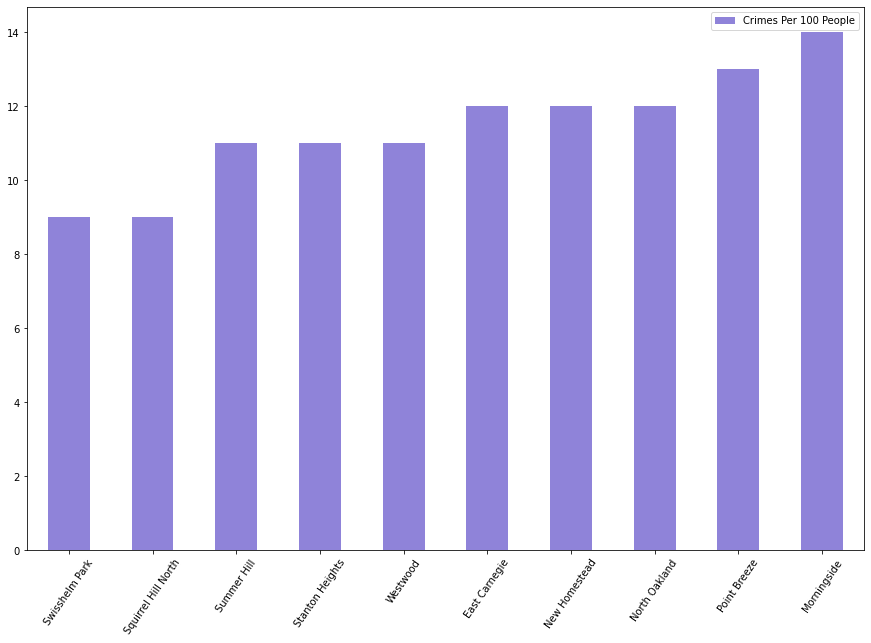

In [27]:
# Sorts the data from least to greatest according to their crimes per 100 people
crimeP100 = crimeP100.sort_values(by=['Crimes Per 100 People'])

# Creates a new dataframe with the top ten entries from crimeP100
lowCrimeP100 = crimeP100.drop(crimeP100.index.to_list()[10:], axis=0)

# Creates a bar graph that slightly rotates the x-axis labels, makes it bigger, and changes the color
lowCrimeP100.plot(kind='bar',alpha=0.75, rot=55, figsize = (15, 10), color = 'slateblue')

# Locks the legend to the top right of the graph
plt.legend(bbox_to_anchor=(1,1))

And with that, the best neighborhoods to live in are Swisshelm Park and Squirrel Hill North (both tied for first place) followed by Summer Hill, Stanton Heights, and Westwood (all tied for second). These 5 neighborhoods have the lowest crimes per 100 people in the city of Pittsburgh making them the safest to live in.

As for how this data-driven determination of the best neighborhood is different from my personal favorite, it's actually very close. Since I'm not from the area of Pittsburgh, I have little knowledge of the different neighborhoods here, but North Oakland has felt safe and looks very pretty making it my favorite neighborhood here. In the graph, North Oakland appeared in the top 10 safest neighborhoods, tied for third place with New Homestead and East Carnegie.

# Final Conclusion

In order to find the safest neighborhood, we need to take a look at the data from all the metrics

In [28]:
lowfiresN.head(11)

,_id
neighborhood,
Regent Square,9
Mt. Oliver,11
East Carnegie,11
Ridgemont,12
Oakwood,13
Arlington Heights,13
St. Clair,13
Swisshelm Park,16
Chartiers City,17


In [29]:
violationsByHood.sort_values("Total Violations").head()

,Ward,Total Violations
30,30,187
25,31,250
18,32,439
31,25,490
20,18,644


As for the neighborhoods in these wards:

**Ward 30: Knoxville**

**Ward 31: Hays, New Homestead, Lincoln Place**

**Ward 32: Overbrook and half of Brookline (not included in Ward 19)**

**Ward 25: A Majority of Central North Side**

**Ward 18: Bon Air, Beltzhoover, Allentown**

In [31]:
lowCrimeP100.head(7)

,Crimes Per 100 People
Swisshelm Park,9
Squirrel Hill North,9
Summer Hill,11
Stanton Heights,11
Westwood,11
East Carnegie,12
New Homestead,12


Overall, the best neighborhood to live in appears to be New Homestead. While it isn't the safest judging by any one of these metrics, it is close to it in all of them. For this reason as we look at all of our data combined, we find it to be the best neighborhood to live in.